In [1112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mkreg

In [1113]:
x, y = mkreg(n_samples=250, n_features=1, noise=10)

In [1114]:
y = y + abs(y/2)
y = y.reshape(y.shape[0], 1)
y.shape

(250, 1)

In [1115]:
x.shape

(250, 1)

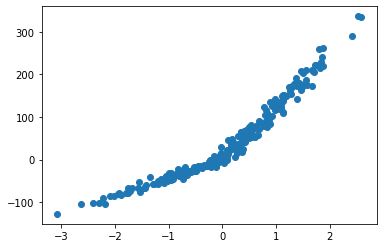

In [1116]:
plt.scatter(x, y)

In [1117]:
bias = np.ones((y.shape[0], 1))
X = np.concatenate((x**2, x, bias), axis=1)
X

array([[ 2.66340262e-01, -5.16081642e-01,  1.00000000e+00],
       [ 3.30916847e+00,  1.81911200e+00,  1.00000000e+00],
       [ 7.61633613e-01, -8.72716227e-01,  1.00000000e+00],
       [ 6.34258623e-02, -2.51844917e-01,  1.00000000e+00],
       [ 4.38027381e+00, -2.09291037e+00,  1.00000000e+00],
       [ 3.28745144e-03, -5.73363012e-02,  1.00000000e+00],
       [ 4.56135453e-01,  6.75378008e-01,  1.00000000e+00],
       [ 1.72404930e+00,  1.31303058e+00,  1.00000000e+00],
       [ 1.62376295e-01,  4.02959422e-01,  1.00000000e+00],
       [ 4.90960256e-02, -2.21576230e-01,  1.00000000e+00],
       [ 3.26493257e+00,  1.80691244e+00,  1.00000000e+00],
       [ 7.55997777e-02, -2.74954137e-01,  1.00000000e+00],
       [ 1.80408163e+00, -1.34316106e+00,  1.00000000e+00],
       [ 2.27865911e-01, -4.77353026e-01,  1.00000000e+00],
       [ 1.42646461e+00, -1.19434694e+00,  1.00000000e+00],
       [ 2.50267702e+00,  1.58198515e+00,  1.00000000e+00],
       [ 1.32900614e+00, -1.15282529e+00

In [1118]:
theta = np.random.randn(X.shape[1], 1)
theta

array([[ 1.23715571],
       [-1.08674071],
       [ 0.35285279]])

In [1119]:
def model(X, theta):
    return X.dot(theta)

In [1120]:
def cost(X, y, theta):
    m = y.shape[0]
    return (1/(2*m)) * np.sum((model(X, theta) - y)**2)

cost(X, y, theta)

4865.916149310802

In [1121]:
def grad(X, y, theta):
    m = y.shape[0]
    return (1/m) * X.T.dot(model(X, theta) - y)

In [1122]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost(X, y, theta)
    return theta, cost_history

In [1123]:
theta_optim, cost_history = gradient_descent(X, y, theta, 0.01, 400)
theta_optim

array([[16.75022129],
       [83.40219018],
       [16.78793447]])

In [1124]:
predictions = model(X, theta_optim)

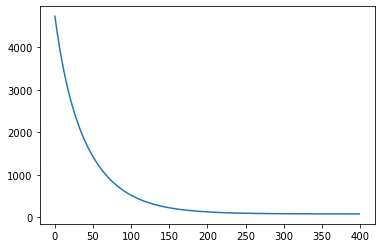

In [1125]:
plt.plot(cost_history)

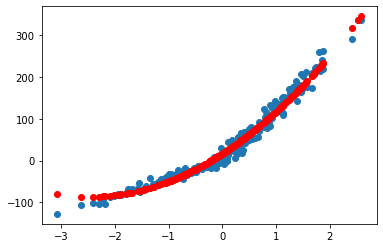

In [1126]:
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

In [1127]:
def determination_coef(y, predictions):
    u = np.sum((y - predictions))**2
    v = np.sum((y - y.mean())**2)
    return 1 - u/v

In [1128]:
determination_coef(y, predictions)

0.9993813948177418